#Análise de Algoritmos - Aula 2

# Exemplos de Notação Assintótica Big O em Python

#### Função O(1) - Tempo constante

####Uma função O(1) executa em tempo constante, independentemente do tamanho da entrada.

In [ ]:
def constant_time(n):
    return n + 1

print(constant_time(10))  # Sempre retorna 11, independentemente do valor de n


11


####Função O(n) - Tempo linear
####Uma função O(n) executa em tempo linear, ou seja, o tempo de execução aumenta proporcionalmente ao tamanho da entrada.

In [ ]:
def linear_time(n):
    total = 0
    for i in range(n):
        total += i
    return total

print(linear_time(10))  # Executa 10 iterações


45


####Função O(n²) - Tempo quadrático
####Uma função O(n²) executa em tempo quadrático, ou seja, o tempo de execução aumenta proporcionalmente ao quadrado do tamanho da entrada.

In [ ]:
def quadratic_time(n):
    total = 0
    for i in range(n):
        for j in range(n):
            total += i + j
    return total

print(quadratic_time(10))  # Executa 10 * 10 iterações


900


####Comparação de Desempenho
####Para visualizar a diferença nos tempos de execução, podemos usar o módulo time para medir o tempo que cada função leva para ser executada com diferentes tamanhos de entrada.

In [ ]:
def measure_time(func, n):
    start_time = time.time()
    result = func(n)
    end_time = time.time()
    return end_time - start_time

n_values = [10, 100, 1000]

for n in n_values:
    print(f"n = {n}")
    print(f"Constant time: {measure_time(constant_time, n):.6f} seconds")
    print(f"Linear time: {measure_time(linear_time, n):.6f} seconds")
    print(f"Quadratic time: {measure_time(quadratic_time, n):.6f} seconds")
    print()


####Visualização Gráfica
####Para uma visualização gráfica, podemos usar a biblioteca matplotlib para plotar os tempos de execução.

In [ ]:
n_values = [10, 50, 100, 200, 500]

constant_times = [measure_time(constant_time, n) for n in n_values]
linear_times = [measure_time(linear_time, n) for n in n_values]
quadratic_times = [measure_time(quadratic_time, n) for n in n_values]

plt.plot(n_values, constant_times, label="O(1)", marker='o')
plt.plot(n_values, linear_times, label="O(n)", marker='o')
plt.plot(n_values, quadratic_times, label="O(n²)", marker='o')
plt.xlabel("Tamanho da entrada (n)")
plt.ylabel("Tempo (seconds)")
plt.title("Comparação complexidade de tempo")
plt.legend()
plt.show()


#Tempo de execução

Com base no exemplo da aula vamos analisar o tempo de execução do exercicio 1 e 2.

In [ ]:
def exercicio1(n):
    i = 0  # Inicialização de i, custo c1, executado 1 vez
    a = 0  # Inicialização de a, custo c2, executado 1 vez

    # Loop while, custo c3, número de execuções é aproximadamente n/2
    while i < n:
        a += i  # Incremento de a com i, custo c4, executado n/2 vezes
        i += 2  # Incremento de i por 2, custo c5, executado n/2 vezes
    return a  # Retorno de a, custo c6, executado 1 vez

# Fórmula completa para o tempo de execução do `exercicio1`

O tempo total de execução \( T(n) \) pode ser expresso como a soma dos produtos do custo de cada linha pelo número de vezes que essa linha é executada:

$ T(n) = c1 \cdot 1 + c2 \cdot 1 + c3 \cdot \left(\frac{n}{2}\right) + c4 \cdot \left(\frac{n}{2}\right) + c5 \cdot \left(\frac{n}{2}\right) + c6 \cdot 1 $

Simplificando, temos:

$ T(n) = c1 + c2 + (c3 + c4 + c5) \cdot \left(\frac{n}{2}\right) + c6 $

Para grandes valores de \( n \), o termo dominante é o linear $ \frac{n}{2} $, portanto a complexidade de tempo é:

$ T(n) \in O(n) $


In [ ]:
def exercicio2(n):
    a = 0  # Inicialização de a, custo c1, executado 1 vez

    # Loop externo de i, custo c2, executado n vezes
    for i in range(n):
        # Loop interno de j, custo c3, executado (i-1) + (i-2) + ... + 1 + 0 vezes
        for j in range(i):
            a += i + j  # Soma de i e j a a, custo c4, executado (i-1) + (i-2) + ... + 1 + 0 vezes
    return a  # Retorno de a, custo c5, executado 1 vez


# Fórmula completa para o tempo de execução do `exercicio2`

O tempo total de execução \( T(n) \) pode ser expresso como a soma dos produtos do custo de cada linha pelo número de vezes que essa linha é executada:

$ T(n) = c1 \cdot 1 + c2 \cdot n + c3 \cdot \sum_{i=0}^{n-1} i + c4 \cdot \sum_{i=0}^{n-1} i + c5 \cdot 1 $

Onde:
$ \sum_{i=0}^{n-1} i = 0 + 1 + 2 + \ldots + (n-1) $
Esta soma é equivalente a:
$ \frac{(n-1)n}{2} $

Substituindo, temos:

$ T(n) = c1 \cdot 1 + c2 \cdot n + c3 \cdot \left(\frac{(n-1)n}{2}\right) + c4 \cdot \left(\frac{(n-1)n}{2}\right) + c5 \cdot 1 $

Simplificando, temos:

$ T(n) = c1 + c2 \cdot n + (c3 + c4) \cdot \frac{n^2 - n}{2} + c5 $

Para grandes valores de \( n \), os termos quadráticos dominam, portanto a complexidade de tempo é:

$ T(n) \in O(n^2) $



# Vamos comparar visualmente os tempos de execução do `exercicio1` e `exercicio2`

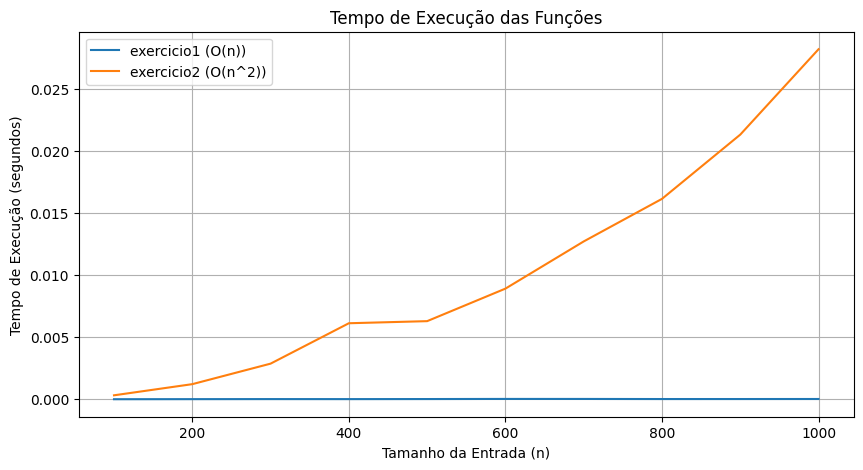

In [ ]:
import time #biblioteca de tempo
import matplotlib.pyplot as plt #biblioteca grafica

def exercicio1(n):
    i = 0
    a = 0
    while i < n:
        a += i
        i += 2
    return a

def exercicio2(n):
    a = 0
    for i in range(n):
        for j in range(i):
            a += i + j
    return a

# Função para medir o tempo de execução
def measure_time(func, n):
    start_time = time.time()
    func(n)
    end_time = time.time()
    return end_time - start_time

# Listas para armazenar os resultados
ns = range(100, 1001, 100)
times_exercicio1 = []
times_exercicio2 = []

# Medindo o tempo de execução para diferentes valores de n
for n in ns:
    times_exercicio1.append(measure_time(exercicio1, n))
    times_exercicio2.append(measure_time(exercicio2, n))

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(ns, times_exercicio1, label='exercicio1 (O(n))')
plt.plot(ns, times_exercicio2, label='exercicio2 (O(n^2))')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Tempo de Execução das Funções')
plt.legend()
plt.grid(True)
plt.show()

#Em Java

###Implementação do Exercício 1

```java
public class Exercicio1 {

    public static int exercicio1(int n) {
        int i = 0;  // Inicialização de i, custo c1, executado 1 vez
        int a = 0;  // Inicialização de a, custo c2, executado 1 vez

        // Loop while, custo c3, número de execuções é aproximadamente n/2
        while (i < n) {
            a += i;  // Incremento de a com i, custo c4, executado n/2 vezes
            i += 2;  // Incremento de i por 2, custo c5, executado n/2 vezes
        }
        return a;  // Retorno de a, custo c6, executado 1 vez
    }

    public static void main(String[] args) {
        int n = 10;  // Exemplo de valor para n
        int resultado = exercicio1(n);
        System.out.println("Resultado: " + resultado);
    }
}
```

### Implementação do Exercício 2

```java
public class Exercicio2 {

    public static int exercicio2(int n) {
        int a = 0;  // Inicialização de a, custo c1, executado 1 vez

        // Loop externo de i, custo c2, executado n vezes
        for (int i = 0; i < n; i++) {
            // Loop interno de j, custo c3, executado i vezes
            for (int j = 0; j < i; j++) {
                a += i + j;  // Soma de i e j a a, custo c4, executado i vezes para cada i
            }
        }
        return a;  // Retorno de a, custo c5, executado 1 vez
    }

    public static void main(String[] args) {
        int n = 5;  // Exemplo de valor para n
        int resultado = exercicio2(n);
        System.out.println("Resultado: " + resultado);
    }
}
```

### Implementação do Algoritmo de ordenação por inserção em Python

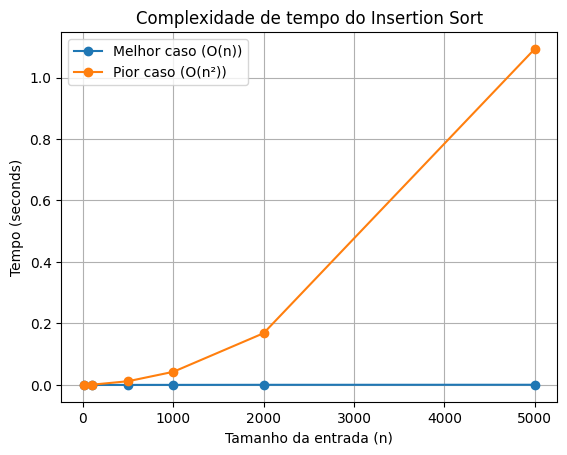

In [ ]:
# Função de ordenação por inserção
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Função para medir o tempo de execução de uma função de ordenação
def measure_time(func, arr):
    start_time = time.time()
    func(arr)
    end_time = time.time()
    return end_time - start_time

# Tamanhos de entrada para o teste
n_values = [10, 100, 500, 1000, 2000, 5000]

# Listas para armazenar os tempos de execução
best_case_times = []
worst_case_times = []

# Medindo os tempos de execução para cada tamanho de entrada
for n in n_values:
    best_case = list(range(n))  # Entrada ordenada (melhor caso)
    worst_case = list(range(n, 0, -1))  # Entrada em ordem inversa (pior caso)

    best_case_times.append(measure_time(insertion_sort, best_case.copy()))
    worst_case_times.append(measure_time(insertion_sort, worst_case.copy()))

# Plotando os resultados
plt.plot(n_values, best_case_times, label="Melhor caso (O(n))", marker='o')
plt.plot(n_values, worst_case_times, label="Pior caso (O(n²))", marker='o')
plt.xlabel("Tamanho da entrada (n)")
plt.ylabel("Tempo (seconds)")
plt.title("Complexidade de tempo do Insertion Sort")
plt.legend()
plt.grid(True)
plt.show()


###Implementaçao do Algoritmo de ordenação por inserção em Java

```java
import java.util.Random;

public class InsertionSortTest {

    /**
     * Implementação do Insertion Sort em Java.
     *
     * @param arr array de inteiros a ser ordenado
     */
    public static void insertionSort(int[] arr) {
        for (int i = 1; i < arr.length; i++) {
            int key = arr[i];
            int j = i - 1;

            // Move os elementos arr[j] que são maiores que key para
            // uma posição à frente da sua posição atual.
            while (j >= 0 && arr[j] > key) {
                arr[j + 1] = arr[j];
                j--;
            }
            arr[j + 1] = key;
        }
    }

    /**
     * Gera um array de inteiros aleatórios no intervalo [0, range).
     *
     * @param size  Tamanho do array
     * @param range Valor máximo de cada elemento
     * @return array de inteiros
     */
    public static int[] generateRandomArray(int size, int range) {
        Random rand = new Random();
        int[] arr = new int[size];
        for (int i = 0; i < size; i++) {
            arr[i] = rand.nextInt(range);
        }
        return arr;
    }

    /**
     * Gera um array já ordenado (crescente) de 0 até size-1.
     *
     * @param size Tamanho do array
     * @return array ordenado de inteiros
     */
    public static int[] generateSortedArray(int size) {
        int[] arr = new int[size];
        for (int i = 0; i < size; i++) {
            arr[i] = i;  // ou outra sequência crescente
        }
        return arr;
    }

    /**
     * Mede o tempo de execução de uma função de ordenação.
     *
     * @param arr o array a ordenar
     * @return tempo em nanosegundos
     */
    public static long measureInsertionSortTime(int[] arr) {
        long start = System.nanoTime();
        insertionSort(arr);
        long end = System.nanoTime();
        return end - start;
    }

    public static void main(String[] args) {
        // Tamanhos solicitados
        int[] sizes = {10, 100, 500, 1000, 2000, 5000};

        System.out.printf("%-10s %-20s %-20s\n", "N", "Ordenado(ns)", "Desordenado(ns)");
        for (int n : sizes) {
            // Gera array ordenado
            int[] sortedArray = generateSortedArray(n);
            // Gera array aleatório (desordenado)
            int[] randomArray = generateRandomArray(n, 100000);

            // Mede tempo para o array ordenado
            long timeSorted = measureInsertionSortTime(sortedArray);

            // Mede tempo para o array aleatório
            long timeRandom = measureInsertionSortTime(randomArray);

            System.out.printf("%-10d %-20d %-20d\n", n, timeSorted, timeRandom);
        }
    }
}

```